<a href="https://colab.research.google.com/github/nagahara-masaaki/spm_python/blob/main/Sparse_modeling_JTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# スパースモデリング
永原正章（北九州市立大学）

## Initialization

Install CVXPY

In [ ]:
! pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import packages

In [ ]:
import cvxpy as cp
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

## Group Testing

In [ ]:
### Group testing
# vector size (number of people)
n = 10000
# number of positives
k = 10
# random seed
np.random.seed(1)

# original vector (n-dimensional, k-sparse)
x_orig = np.zeros(n)
S = np.random.randint(n,size=k)
x_orig[S] = 1

# number of tests
m = 1000

# testing matrix
A = np.random.randint(2,size=(m, n))

# result vector
y = A @ x_orig

#### optimization by CVXPY
# optimization variable
x = cp.Variable(n)
# cost function (L1 norm)
cost = cp.norm1(x)
# constraints (linear equations)
constraints = [A @ x == y]
# optimization problem
prob = cp.Problem(cp.Minimize(cost), constraints)
# solve by CVXPY
prob.solve()
# print the result
print("status:", prob.status)
print("optimal value", prob.value)

status: optimal_inaccurate
optimal value 9.999999992604387


Results:

(array([ 144,  235,  905, 2895, 3462, 4225, 5056, 5192, 7751, 7813]),)
(array([ 144,  235,  905, 2895, 3462, 4225, 5056, 5192, 7751, 7813]),)


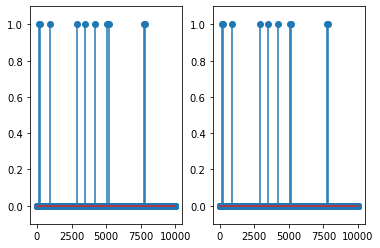

In [ ]:

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x.value,use_line_collection=True)
plt.ylim(-0.1,1.1)
print(np.nonzero(x_orig))
x_est=np.trunc(x.value*1000)/1000
print(x_est.nonzero())


## Sparse polynomial curve fitting

Generate data

In [ ]:
# Original coefficient vector
n = 81
x_orig = np.zeros(n)
x_orig[0] = -1
x_orig[n-2] = 1

# Measurement vetor y
m = 11
delta = 1/(m-1)
t = np.arange(0,1+delta,delta)
y = np.polyval(x_orig,t)

10-th interpolating polynomial

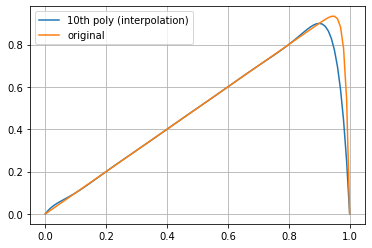

In [ ]:
# Vandermonde matrix
Phi = np.vander(t)
# Solve linear equation Phi * x = y
x_11 = LA.solve(Phi,y)
# Plot the obtained curve
mm = 101
dd = 1/(mm-1)
time = np.arange(0,1+dd,dd)

fig, ax = plt.subplots()
ax.plot(time, np.polyval(x_11,time), label='10th poly (interpolation)')
ax.plot(time, np.polyval(x_orig,time), label='original')
ax.legend()
ax.grid()


Ridge regression (L2 regularization)

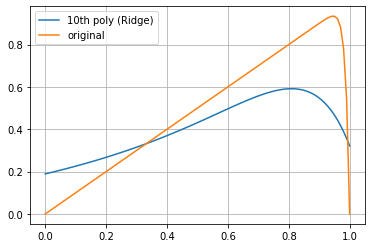

In [ ]:
# Regularization parameter lambda
lmbd = 0.2
# Solve L2 regularization
A = np.identity(m) + np.dot(Phi.T,Phi)
b = np.dot(Phi.T,y)
x_ridge = LA.solve(A,b)
# Plot the obtained curve
fig, ax = plt.subplots()
ax.plot(time, np.polyval(x_ridge,time), label='10th poly (Ridge)')
ax.plot(time, np.polyval(x_orig,time), label='original')
ax.legend()
ax.grid()


Ridge regression (L2 regularization), 80th polynomial

(-1.1, 1.1)

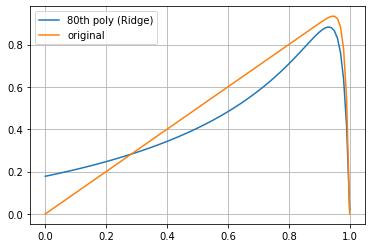

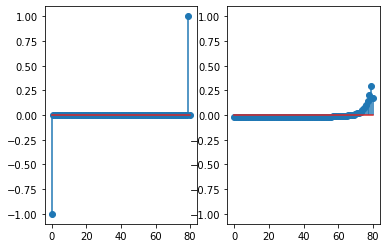

In [ ]:
# Extended Vandermonde matrix
Phi_e = np.vander(t,n)
# Regularization parameter lambda
lmbd = 0.2
# Solve L2 regularization
A = np.identity(n) + np.dot(Phi_e.T,Phi_e)
b = np.dot(Phi_e.T,y)
x_ridge = LA.solve(A,b)

# Plot the obtained curve
fig, ax = plt.subplots()
ax.plot(time, np.polyval(x_ridge,time), label='80th poly (Ridge)')
ax.plot(time, np.polyval(x_orig,time), label='original')
ax.legend()
ax.grid()

# Plot the obtained coefficients
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x_ridge,use_line_collection=True)
plt.ylim(-1.1,1.1)

Sparse modeling

status: optimal
optimal value 1.9999999994152589


(-1.1, 1.1)

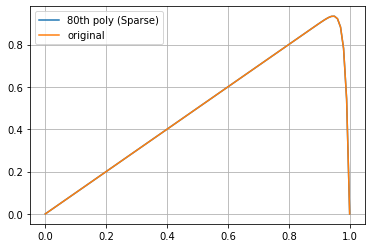

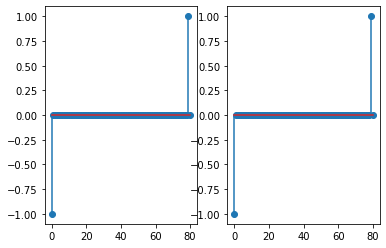

In [ ]:
# Extended Vandermonde matrix
Phi_e = np.vander(t,n)
# optimization variable
x = cp.Variable(n)
# cost function (L1 norm)
cost = cp.norm1(x)
# constraints (linear equations)
constraints = [Phi_e @ x == y]
# optimization problem
prob = cp.Problem(cp.Minimize(cost), constraints)
# solve by CVXPY
prob.solve()
# print the result
print("status:", prob.status)
print("optimal value", prob.value)

# Plot the obtained curve
fig, ax = plt.subplots()
ax.plot(time, np.polyval(x.value,time), label='80th poly (Sparse)')
ax.plot(time, np.polyval(x_orig,time), label='original')
ax.legend()
ax.grid()

# Plot the obtained coefficients
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-1.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x.value,use_line_collection=True)
plt.ylim(-1.1,1.1)

## Python CVX の練習

In [ ]:
# vector size
n = 1000
k = 5
# random seed
np.random.seed(1)
# original vector (n-dimensional, k-sparse)
x_orig = np.zeros(n)
S = np.random.randint(n,size=k)
x_orig[S] = 1

Measurement matrix $A$

In [ ]:
# measurement matrix (random matrix)
m = 100
A = np.random.randn(m, n)

Measurement vector $y$

In [ ]:
# measurement vector
y = np.dot(A, x_orig) + np.random.randn(m) * np.sqrt(0.1)

Optimization (1) $$\text{minimize} ~ \|x\|_1 ~~ \text{subjec to} ~ Ax = y$$

status: optimal
optimal value 6.370071855682554


(-0.1, 1.1)

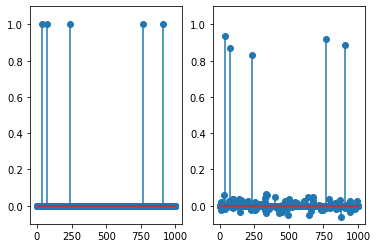

In [ ]:
# optimization variable
x = cp.Variable(n)
# cost function (L1 norm)
cost = cp.norm1(x)
# constraints (linear equations)
constraints = [A @ x == y]
# optimization problem
prob = cp.Problem(cp.Minimize(cost), constraints)
# solve by CVXPY
prob.solve()
# print the result
print("status:", prob.status)
print("optimal value", prob.value)

# Figures
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x.value,use_line_collection=True)
plt.ylim(-0.1,1.1)


Optimization (3) $$\text{minimize} ~ \|Ax-y\|_2^2 + \lambda \|x\|_1 \text{  subject to  } 0\leq x\leq 1$$ 

status: optimal
optimal value 64.94902736659523


(-0.1, 1.1)

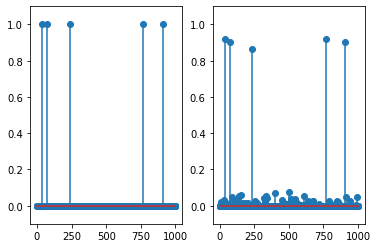

In [ ]:
# optimization variable
x = cp.Variable(n)
# cost function (LASSO)
lmbd = 10
cost = cp.norm1(A @ x - y) + lmbd * cp.norm1(x)
# constraints (between 0 and 1)
constraints = [0 <= x, x <= 1]
# optimization problem
prob = cp.Problem(cp.Minimize(cost), constraints)
# solve by CVXPY
prob.solve()
# print the result
print("status:", prob.status)
print("optimal value", prob.value)

# Figures
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x.value,use_line_collection=True)
plt.ylim(-0.1,1.1)

# 凸最適化

Douglas-Rachford 分離アルゴリズム

In [ ]:
## Douglas Rachford splitting
# vector size
n = 1000
k = 5
# random seed
np.random.seed(1)
# original vector (n-dimensional, k-sparse)
x_orig = np.zeros(n)
S = np.random.randint(n,size=k)
x_orig[S] = 1
# measurement matrix (random matrix)
m = 100
A = np.random.randn(m, n)
# measurement vector
y = np.dot(A, x_orig) + np.random.randn(m) * np.sqrt(0.1)

# soft-thresholding function
def soft_thresholding(lmbd,x):
  return np.sign(x) * np.maximum(np.abs(x)-lmbd,0)

# matrix M and vector w
M1 = A.T @ LA.inv(A @ A.T)
M = np.eye(n) - M1 @ A
w = M1 @ y

# iteration
MAX_ITER = 1000
gamma = 1
z = np.zeros(n)
for i in np.arange(MAX_ITER):
  x = soft_thresholding(gamma,z)
  z = z + M @ (2*x - z) + w - x



(-0.1, 1.1)

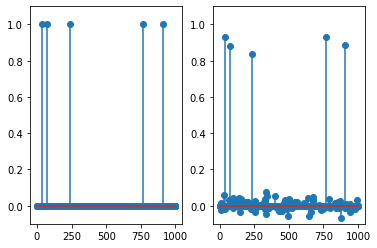

In [ ]:
# Figures
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x,use_line_collection=True)
plt.ylim(-0.1,1.1)

Iterative Shrinkage-Thresholding (IST)

In [ ]:
## Iterative Shrinkage-Thresholding (IST)
# vector size
n = 1000
k = 5
# random seed
np.random.seed(1)
# original vector (n-dimensional, k-sparse)
x_orig = np.zeros(n)
S = np.random.randint(n,size=k)
x_orig[S] = 1
# measurement matrix (random matrix)
m = 100
A = np.random.randn(m, n)
# measurement vector
y = np.dot(A, x_orig) + np.random.randn(m) * np.sqrt(0.1)

# soft-thresholding function
def soft_thresholding(lmbd,x):
  return np.sign(x) * np.maximum(np.abs(x)-lmbd,0)

# matrix M and vector w
M1 = A.T @ LA.inv(A @ A.T)
M = np.eye(n) - M1 @ A
w = M1 @ y

# LASSO
lmbd = 10
normA = LA.norm(A,2)
c = normA**2

# iteration
MAX_ITER = 1000
gamma = 1
x = np.zeros(n)
for i in np.arange(MAX_ITER):
  x = soft_thresholding(lmbd/c,A.T @ (y - A @ x)/c + x)



(-0.1, 1.1)

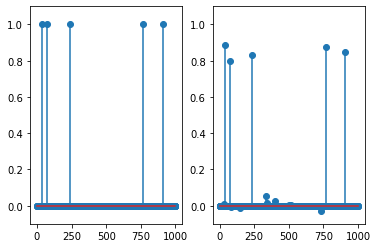

In [ ]:
# Figures
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.stem(x_orig,use_line_collection=True)
plt.ylim(-0.1,1.1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.stem(x,use_line_collection=True)
plt.ylim(-0.1,1.1)